Habíamos visto en clase que una solución estática para la ecuación de movimiento en 1+2 dimensiones con el potencial de sombrero mexicano 
$$\nabla^2\Phi(x,t)-\lambda (\Phi \Phi^*-\nu^2)=0$$ 
estaba dada por 
$$\Phi(r,\theta)=f(r)e^{in\theta};  n=...,-2,-1,0,1,2...$$ 
de tal manera que se satisfaga 
$$\displaystyle \lim_{r \to \infty}f(r)=\nu$$ 
es decir, que en un punto del infinito vaya a un estado de vacio. \
Utilizando el laplaciano en coordenadas polares 
$$\nabla^2=\frac{\partial^2}{\partial r^2}+\frac{1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}$$ 
sobre $\Phi(r,\theta)$ llegamos al siguiente resultado 
$$\nabla^2 \Phi(r,t)=\frac{\partial^2  \Phi(r,t)}{\partial r^2}+\frac{1}{r}\frac{\partial  \Phi(r,t)}{\partial r}+\frac{1}{r^2}\frac{\partial^2  \Phi(r,t)}{\partial \theta^2} $$ 
$$=\frac{\partial^2 f(r)e^{in\theta} }{\partial r^2}+\frac{1}{r}\frac{\partial f(r)e^{in\theta}}{\partial r}+\frac{1}{r^2}\frac{\partial^2  f(r)e^{in\theta}}{\partial \theta^2}$$ 
$$=e^{in\theta} \frac{\partial^2 f(r)} {\partial r^2}+\frac{e^{in\theta}}{r}\frac{\partial f(r)}{\partial r}+\frac{f(r)}{r^2} \frac{\partial^2 e^{in\theta}}{\partial \theta^2}$$ 
$$=e^{in\theta} \left [ \frac{d^2 f} {d r^2}+\frac{1}{r}\frac{d f}{d r}-n^2 \frac{f}{r^2} \right ]$$ 
además dado que 
$$\Phi^*=f(r)e^{-in\theta}$$ 
entonces 
$$\Phi \Phi^*=f^2$$ 
y se llega a la ecuación de movimiento buscada 
$$ e^{in\theta} \left [ \frac{d^2 f} {d r^2}+\frac{1}{r}\frac{d f}{d r}-n^2 \frac{f}{r^2} \right ] -\lambda (f^2-\nu ^2) fe^{in\theta}$$ 
$$=\frac{d^2 f} {d r^2}+\frac{1}{r}\frac{d f}{d r}-n^2 \frac{f}{r^2}-\lambda (f^2-\nu ^2) f$$ 
$$=f''+\frac{1}{r}f'-n^2 \frac{f}{r^2}-\lambda (f^2-\nu ^2) f=0$$
con la condición de frontera en $r=0$
$$\displaystyle \lim_{r \to 0}f(r)=0$$ 
$$\displaystyle \lim_{r \to 0}f'(r)=f'(r=0)=f'_{0}$$ 

Por otra parte la densidad de energía está dada por 
$$ \rho (t,\vec{x})=\dot{\Phi}\dot{\Phi}^*+\vec{\nabla}\Phi \bullet \vec{ \nabla}\Phi^* + \frac{\lambda}{2}(\Phi \Phi^*-\nu^2)^2$$
que en el caso estático se convierte en
$$ \rho (\vec{x})=\vec{\nabla}\Phi \bullet \vec{ \nabla}\Phi^* + \frac{\lambda}{2}(\Phi \Phi^*-\nu^2)^2$$
y con el $\Phi(r,\theta)$ utilizado se obtiene
$$ \rho (\vec{x})= \rho(r)=\vec{\nabla}f(r)e^{in\theta} \bullet \vec{ \nabla}f(r)e^{-in\theta} + \frac{\lambda}{2}(f(r)e^{in\theta}f(r)e^{-in\theta}-\nu^2)^2$$
$$ =\vec{\nabla}f(r) \bullet \vec{ \nabla}f(r) + \frac{\lambda}{2}(f(r)e^{in\theta}f(r)e^{-in\theta}-\nu^2)^2$$
$$ =e^{in\theta}(\vec{\nabla}f+in\vec{\nabla}\theta) \bullet e^{-in\theta}(\vec{\nabla}f-in\vec{\nabla}\theta)  + \frac{\lambda}{2}(f^2-\nu^2)^2$$
$$ =(\vec{\nabla}f+in\vec{\nabla}\theta) \bullet (\vec{\nabla}f-in\vec{\nabla}\theta)  + \frac{\lambda}{2}(f^2-\nu^2)^2$$
$$ =\vec{\nabla}f \bullet \vec{\nabla}f + f^2 \vec{\nabla}\theta \bullet  \vec{\nabla}\theta + \frac{\lambda}{2}(f^2-\nu^2)^2$$
$$ =(f' \hat{e}_r) \bullet (f' \hat{e}_r) + f^2 (\frac{1}{r} \hat{e}_{\theta}) \bullet (\frac{1}{r} \hat{e}_{\theta}) + \frac{\lambda}{2}(f^2-\nu^2)^2$$
$$ =f'^2 + \frac{f^2}{r^2}  + \frac{\lambda}{2}(f^2-\nu^2)^2$$

Para $n=0$ la ecuación a resolver es 
$$f''+\frac{1}{r} f'-\lambda (f^2-\nu^2)f=0$$ 
$$f''=\lambda (f^2-\nu^2)f-\frac{1}{r} f'$$ 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import Codigo as cod

In [ ]:
nu=1;
l=1;
x_0=np.array([0,70.803978231]); 
r_0=0;
r_f=10;
N1=1000;
h1=0.01;
n=0;

# declaración de la función del sistema de EDOs
def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=f[1];
        s[1]=0;
    else:
        s[0]=f[1]; #solucion
        s[1]=-f[1]/r+(n**2)*(f[0]/r**2)+l*(f[0]**2-nu**2)*f[0]; #Derivada 
    return s

#Solucion numerica
f,r=cod.RK4V(N1,h1,f1,x_0,r_0);

dens=np.zeros(N1-301);
xi=np.zeros(N1-301);
for i in range(0,N1-301):
    dens[i]=(f[i+1,1])**2+(f[i+1,0])**2/(r[i+1])**2+(l/2)*((f[i+1,0])**2-nu**2)**2;
    xi[i]=r[i+1];

E=cod.int(dens,h1);
print("Energía en r distinto de cero: E=",E)

fig, ax = plt.subplots();
ax.plot(r,f[:,0],'r-');
ax.plot(xi,dens,'b-');
ax.set_title('Solución n=0, sin shooting')
ax.set_xlim(0,7);
ax.set_ylim(0,10);
ax.set_xlabel(r"$t$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r),df(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$', r'$Densidad-energía$']
ax.legend(L)
plt.grid();
plt.show()

Para evitar errores en la resolución numérica para $n>=1$ es conveniente redefinir la función $f$ como $$f(r)=\sigma (r)r^n$$ de esta manera podremos resolver la ecuación para $\sigma$ siguiente
$$f'=n r^{n-1} \sigma+r^n \sigma'$$
$$f''=n(n-1)r^{n-2}\sigma+n r^{n-1} \sigma' +n r^{n-1} \sigma'+r^n \sigma''=r^n \sigma''+2n r^{n-1} \sigma'+n(n-1)r^{n-2}\sigma$$
$$r^n \sigma''+2n r^{n-1} \sigma'+n(n-1)r^{n-2}\sigma + \frac{n r^{n-1} \sigma+r^n \sigma'}{r} -n^2 \frac{r^n \sigma}{r^2}-\lambda ((r^n \sigma)^2-\nu ^2) r^n \sigma=0$$
$$\sigma'' + \frac{1}{r}(2n+1)\sigma'-\lambda ((r^n \sigma)^2-\nu ^2)\sigma=0$$
$$\sigma''= \lambda ((r^n \sigma)^2-\nu ^2)\sigma - \frac{1}{r}(2n+1)\sigma'$$
con las condiciones iniciales
$$\sigma(r=0)= \sigma _0$$
$$ \sigma' (r=0)= 0$$

Para n=1 la ecuación a resolver es
$$ \sigma''= \lambda ((r \sigma)^2-\nu ^2)\sigma - \frac{3}{r}\sigma' $$

In [ ]:
n =1;
dsig_0=0;
l = 1;
rf = 10;
ri = 0;
Cond_0 = [0.5061, dsig_0];
N1=1000;
h=0.01;
nu=1;

def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=dsig_0;
        s[1]=f[1];
    else:
        s[0]=f[1]; #solucion
        s[1]=l*(((r**n)*f[0])**2-nu**2)*f[0]-((2*(n+1))*f[1])/r; #Derivada 
    return s

sig,r = cod.RK4V(N,h,f1,Cond_0,ri);

f=sig[:,0]*(r[:]**n);
df=n*(r**(n-1)*sig[:,0])+(r**n)*(sig[:,1]);

dens=np.zeros(N1-301);
xi=np.zeros(N1-301);
for i in range(0,N1-301):
    dens[i]=(df[i+1])**2+(f[i+1])**2/(r[i+1])**2+(l/2)*((f[i+1])**2-nu**2)**2;
    xi[i]=r[i+1];

E=cod.int(dens,h);
print("Energía en r distinto de cero: E=",E)

fig, ax = plt.subplots();
ax.plot(r,f,'b-');
ax.plot(xi,dens,'r-');
ax.set_title('Solución n=1, sin shooting')
ax.set_xlim(0,7);
ax.set_ylim(0,2);
ax.set_xlabel(r"$r$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$',r'Densidad-energía']
ax.legend(L)
plt.grid()
plt.show()

In [ ]:
n =1;
dsig_0=0;
l = 1;
rf = 10;
ri = 0;
Cond_0 = [0.5061, dsig_0];
N=1000;
h=0.01;
nu=1;

def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=dsig_0;
        s[1]=f[1];
    else:
        s[0]=f[1]; #solucion
        s[1]=l*(((r**n)*f[0])**2-nu**2)*f[0]-((2*(n+1))*f[1])/r; #Derivada 
    return s

sig,r = cod.RK4V(N,h,f1,Cond_0,ri);

f=sig[:,0]*(r[:]**n);
df=n*(r**(n-1)*sig[:,0])+(r**n)*(sig[:,1]);

dens=np.zeros(N1-301);
xi=np.zeros(N1-301);
for i in range(0,N1-301):
    dens[i]=(df[i+1])**2+(f[i+1])**2/(r[i+1])**2+(l/2)*((f[i+1])**2-nu**2)**2;
    xi[i]=r[i+1];

E=cod.int(dens,h);
print("Energía en r distinto de cero: E=",E)

fig, ax = plt.subplots();
ax.plot(r,f,'b-');
ax.plot(xi,dens,'r-');
ax.set_title('Solución n=1, sin shooting')
ax.set_xlim(0,7);
ax.set_ylim(0,2);
ax.set_xlabel(r"$r$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$',r'Densidad-energía']
ax.legend(L)
plt.grid()
plt.show()

In [ ]:
n =1;
dsig_0=0;
l = 1;
rf = 10;
ri = 0;
sig_0_i = 0.1;
sig_0_f = 0.51;
N=1000;
h=0.01;
nu=1;

def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=dsig_0;
        s[1]=f[1];
    else:
        s[0]=f[1]; #solucion
        s[1]=l*(((r**n)*f[0])**2-nu**2)*f[0]-((2*(n+1))*f[1])/r; #Derivada 
    return s

sig_0 = cod.shooting2(sig_0_f,sig_0_i, l, nu, n,  rf, ri, dsig_0,f1,N,h);
Cond_0 = [sig_0, dsig_0];
print("der0",Cond_0);
sig,r = cod.RK4V(N,h,f1,Cond_0,ri);

f=sig[:,0]*(r[:]**n);
    
fig, ax = plt.subplots();
ax.plot(r,f,'co');
#ax.plot(r,f[:,1],'yo');
ax.set_title('Solución n=1, sin shooting')
ax.set_xlim(0,10);
ax.set_ylim(0,1);
ax.set_xlabel(r"$r$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$']
ax.legend(L)
plt.grid()
plt.show()

Para n=2 la ecuacion a resolver es
$$ \sigma''= \lambda ((r \sigma)^2-\nu ^2)\sigma - \frac{5}{r}\sigma' $$

In [1]:
n =2;
dsig_0=0;
l = 1;
rf = 10;
ri = 0;
Cond_0 = [0.1267, dsig_0];
N=1000;
h=0.01;
nu=1;

def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=dsig_0;
        s[1]=f[1];
    else:
        s[0]=f[1]; #solucion
        s[1]=l*(((r**n)*f[0])**2-nu**2)*f[0]-((2*(n+1))*f[1])/r; #Derivada 
    return s

sig,r = cod.RK4V(N,h,f1,Cond_0,ri);

f=sig[:,0]*(r[:]**n);
df=n*(r**(n-1)*sig[:,0])+(r**n)*(sig[:,1]);

dens=np.zeros(N1-301);
xi=np.zeros(N1-301);
for i in range(0,N1-301):
    dens[i]=(df[i+1])**2+(f[i+1])**2/(r[i+1])**2+(l/2)*((f[i+1])**2-nu**2)**2;
    xi[i]=r[i+1];
    
E=cod.int(dens,h);
print("Energía en r distinto de cero: E=",E);

fig, ax = plt.subplots();
ax.plot(r,f,'b-');
ax.plot(xi,dens,'r-');
ax.set_title('Solución n=2, sin shooting')
ax.set_xlim(0,7);
ax.set_ylim(0,2);
ax.set_xlabel(r"$r$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$',r'$Densidad-energía$']
ax.legend(L)
plt.grid()
plt.show()

NameError: name 'cod' is not defined

In [ ]:
n =2;
dsig_0=0;
l = 1;
rf = 10;
ri = 0;
sig_0_i = 0.1;
sig_0_f = 0.2;
N=1000;
h=0.01;
nu=1;

def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=dsig_0;
        s[1]=f[1];
    else:
        s[0]=f[1]; #solucion
        s[1]=l*(((r**n)*f[0])**2-nu**2)*f[0]-((2*(n+1))*f[1])/r; #Derivada 
    return s

sig_0 = cod.shooting2(sig_0_f,sig_0_i, l, nu, n,  rf, ri, dsig_0,f1,N,h);
Cond_0 = [sig_0, dsig_0];
print("der0",Cond_0);
sig,r = cod.RK4V(N,h,f1,Cond_0,ri);

f=sig[:,0]*(r[:]**n);
    
fig, ax = plt.subplots();
ax.plot(r,f,'co');
#ax.plot(r,f[:,1],'yo');
ax.set_title('Solución n=1, sin shooting')
ax.set_xlim(0,10);
ax.set_ylim(0,1);
ax.set_xlabel(r"$r$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$']
ax.legend(L)
plt.grid()
plt.show()

El modelo más simple que nos da monopolos globales es el siguiente
$$L = \frac{1}{2} \partial _{\mu} \Phi^{\alpha} \partial ^{\mu} \Phi^{\alpha}-\frac{\lambda}{4}(|\Phi|^2-\nu^2)^2$$
con $\alpha=1,2,3$ y $\mu=0,1,2,3$. $\Phi^{\alpha}$ es una tripleta de campos escalares y cada uno de estos es una componente a lo largo del vector unitario radial en coordenadas esféricas, es decir
$$\Phi^{1}=f(r,t)sin(\theta)cos(\phi)$$ 
$$\Phi^{2}=f(r,t)sin(\theta)sin(\phi)$$
$$\Phi^{3}=f(r,t)cos(\theta)$$  
además los campos satisfacen $|\Phi|^2=\sqrt{\Phi^{\alpha}\Phi^{\alpha}}=(f(x,t))^2$. Notar que la dependencia temporal del campo está en f.\
Las ecuaciones de movimiento para un campo arbitrario $\alpha$ 
$$\partial_{\mu} \left [  \frac{\partial L}{\partial (\partial \Phi^{\alpha})} \right ] -\frac{\partial L}{\partial \Phi^{\alpha}} $$
nos llevan al siguiente resultado utilizando la densidad lagrangiana de arriba
$$\Box \Phi^{\alpha}-\lambda (|\Phi|^2-\nu^2)\Phi^{\alpha}=0$$
o bien
$$- \frac{\partial^2 \Phi^{\alpha}}{\partial t^2} + \nabla^2 \Phi^{\alpha}-\lambda (|\Phi|^2-\nu^2)\Phi^{\alpha}=0$$ 
este es un sistema de 3 ecuaciones, una para cada $\Phi^{\alpha}$, sin embargo, dada la simetría del problema todas las ecuaciones coinciden, es decir, las 3 componentes del campo son iguales. Esto nos será de utilidad para conocer las condiciones de frontera más adelante. \ 
El laplaciano en coordenadas esféricas está dado por
$$ \nabla^2 = \frac{1}{r^2} \frac{\partial}{\partial r} \left (  r^2 \frac{\partial}{\partial r} \right ) +\frac{1}{r^2 sin(\theta)} \frac{\partial}{\partial \theta} \left (  sin(\theta) \frac{\partial}{\partial \theta} \right ) +  \frac{1}{r^2 sin^2(\theta)} \left ( \frac{\partial^2}{\partial \phi^2} \right ) $$
y lo aplicaremos en alguno de los campos $\alpha$, por simplicidad será al tercero
$$ \nabla^2 \Phi^{3}= \frac{1}{r^2} \frac{\partial}{\partial r} \left (  r^2 \frac{\partial \Phi^{3}}{\partial r} \right ) +\frac{1}{r^2 sin(\theta)} \frac{\partial}{\partial \theta} \left (  sin(\theta) \frac{\partial \Phi^{3}}{\partial \theta} \right ) +  \frac{1}{r^2 sin^2(\theta)} \left ( \frac{\partial^2\Phi^{3}}{\partial \phi^2} \right ) $$
$$ = \frac{1}{r^2} \frac{\partial}{\partial r} \left (  r^2 \frac{\partial (f(r)cos(\theta))}{\partial r} \right ) +\frac{1}{r^2 sin(\theta)} \frac{\partial}{\partial \theta} \left (  sin(\theta) \frac{\partial (f(r)cos(\theta))}{\partial \theta} \right ) +  \frac{1}{r^2 sin^2(\theta)} \left ( \frac{\partial^2(f(r)cos(\theta))}{\partial \phi^2} \right ) $$
$$ = \frac{cos(\theta)}{r^2} \frac{d}{dr} \left (  r^2 \frac{d f(r)}{d r} \right ) +\frac{f(r)}{r^2 sin(\theta)} \frac{d}{d \theta} \left (  sin(\theta) \frac{d cos(\theta)}{d \theta} \right ) $$
$$ = \frac{cos(\theta)}{r^2} \frac{d}{dr} \left (  r^2 f' \right ) - \frac{f}{r^2 sin(\theta)} \frac{d}{d \theta} \left (  sin^2(\theta) \right ) $$
$$ = \frac{cos(\theta)}{r^2} \left (  r^2 f''+2rf' \right ) - \frac{f}{r^2 sin(\theta)} \left (  2sin(\theta)cos(\theta) \right ) $$
$$ = cos(\theta) \left (  f''+\frac{2f'}{r} \right ) - \frac{2fcos(\theta)}{r^2} $$
sustituyendo este resultado en la ecuación dinámica obtenemos
$$ -\frac{\partial^2 f(r,t)cos(\theta)}{\partial t^2} + cos(\theta) \left (  f''+\frac{2f'}{r} \right ) - \frac{2fcos(\theta)}{r^2} - \lambda (|\Phi|^2-\nu^2)fcos(\theta)=0$$
dividimos sobre $cos(\theta)$ y simplificamos
$$ -\frac{\partial^2 f(r,t)}{\partial t^2} +  f''+\frac{2f'}{r} - \frac{2f}{r^2} - \lambda (|\Phi|^2-\nu^2)f=0$$
$$ -\ddot{f} +  f''+\frac{2f'}{r} - \frac{2f}{r^2} - \lambda (|\Phi|^2-\nu^2)f=0$$
adicionalmente sustituimos el término del módulo cuadrado del campo
$$ -\ddot{f} +  f''+\frac{2f'}{r} - \frac{2f}{r^2} - \lambda (f^2-\nu^2)f=0$$
que en el caso estático se convierte en
$$ f''+\frac{2f'}{r} - \frac{2f}{r^2} - \lambda (f^2-\nu^2)f=0$$
Establecemos la condición al infinito sabiendo que en una esfera de radio $r\rightarrow \infty$ las componentes del campo deben irse a un estado de vacío $\nu$ de tal manera que sigan siendo solución de la ecuación dinámica y, en principio, un mínimo de la energía. Si cada componente del campo se va a $\nu$, entonces el módulo del campo en el infinito va a $\sqrt{3} \nu$. Las condiciones de frontera son entonces las siguientes
$$\displaystyle \lim_{r \to \infty}f(r)=\nu$$ 
y como en el caso del vortice global para $r=0$
$$\displaystyle \lim_{r \to 0}f(r)=0$$  
$$\displaystyle \lim_{r \to 0}f'(r)=f'(r=0)=f'_{0}$$ 



Por otro lado, la densidad de energía está dada por la siguiente expresión
$$ \rho (t,\vec{x}) = \frac{1}{2} \partial _{\mu} \Phi^{\alpha} \partial ^{\mu} \Phi^{\alpha}+\frac{\lambda}{4}(|\Phi|^2-\nu^2)^2$$
notar que tenemos dos sumas, una sobre $\mu$ y otra sobre $\alpha$, asi pues
$$ \rho (t,\vec{x})= \frac{1}{2} (\dot{\Phi}^{\alpha})^2 + \frac{1}{2} (\vec{\nabla} \Phi^{\alpha} \bullet \vec{\nabla} \Phi^{\alpha}) +\frac{\lambda}{4}(f^2-\nu^2)^2$$
$$ = \frac{1}{2} (\dot{\Phi}^{\alpha})^2 +\frac{1}{2} (\vec{\nabla} \Phi^{\alpha})^2 +\frac{\lambda}{4}(f^2-\nu^2)^2$$
con
$$ (\dot{\Phi}^{\alpha})^2 = (\dot{\Phi}^{1})^2 + (\dot{\Phi}^{2})^2 + (\dot{\Phi}^{3})^2 = (\dot{f} sin(\theta) cos(\phi))^2 + (\dot{f} sin(\theta) sin(\phi))^2 +(\dot{f} cos(\theta))^2 $$
$$ = \dot{f}^2 sin^2(\theta) cos^2(\phi) + \dot{f}^2 sin^2(\theta) sin^2(\phi) +\dot{f}^2 cos^2(\theta) = \dot{f}^{2}$$
y del gradiente en coordenadas esféricas
$$ \vec{\nabla} = \hat{r} \frac{\partial}{\partial r} + \frac{\hat{\theta}}{r} \frac{\partial}{\partial \theta} + \frac{\hat{\phi}}{r sin(\theta)} \frac{\partial}{\partial \phi}$$
obtenemos
$$ (\vec{\nabla} \Phi^{\alpha})^2 = (\vec{\nabla} \Phi^{1})^2 + (\vec{\nabla} \Phi^{2})^2 + (\vec{\nabla} \Phi^{3})^2$$
$$ = \left ( \hat{r} f'sin(\theta)cos(\phi) + \hat{\theta} \frac{fcos(\theta)cos(\phi)}{r}  - \hat{\phi} \frac{fsin(\phi)}{r} \right )^2 + \left ( \hat{r} f'sin(\theta)sin(\phi) + \hat{\theta} \frac{fcos(\theta)sin(\phi)}{r}  + \hat{\phi} \frac{fcos(\phi)}{r} \right )^2 + \left ( \hat{r} f'cos(\theta) - \hat{\theta} \frac{fsin(\theta)}{r} \right )^2$$
$$ = \left ( (f')^2 sin^2(\theta)cos^2(\phi) + \frac{f^2 cos^2(\theta) cos^2(\phi)}{r^2}  + \frac{f^2 sin^2(\phi)}{r^2} \right ) + \left ( (f')^2 sin^2(\theta)sin^2(\phi) + \frac{f^2 cos^2(\theta)sin^2(\phi)}{r^2}  + \frac{f^2 cos^2(\phi)}{r^2} \right ) + \left ( (f')^2 cos^2(\theta) + \frac{f^2 sin^2(\theta)}{r^2} \right )$$
$$ = f'^2+\frac{f^2}{r^2}+\frac{f^2}{r^2}= f'^2+\frac{2 f^2}{r^2}$$
sustituyendo los resultados en la expresión para la densidad de energía obtenemos
$$ \rho (t,\vec{x})= \rho (t,r)= \frac{1}{2} (\dot{f})^2 + \frac{1}{2} (f'^2+\frac{2 f^2}{r^2}) +\frac{\lambda}{4}(f^2-\nu^2)^2$$
$$ = \frac{1}{2} \dot{f}^2 + \frac{1}{2} f'^2 + \frac{f^2}{r^2} +\frac{\lambda}{4}(f^2-\nu^2)^2$$
o en el caso estático
$$ \rho(r) = \frac{1}{2} f'^2 + \frac{f^2}{r^2} +\frac{\lambda}{4}(f^2-\nu^2)^2$$

In [ ]:
# Caso estático para el monopolo global

nu=1;
l=1;
x_0=np.array([0,0.5061]); #0.5061
r_0=0;
r_f=10;
N1=1000;
h1=0.01;

# declaración de la función del sistema de EDOs
def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=f[1];
        s[1]=0;
    else:
        s[0]=f[1]; #solucion
        s[1]=-(2*f[1])/r+((2*f[0])/r**2)+l*(f[0]**2-nu**2)*f[0]; #Derivada 
    return s

#Solucion numerica
f,r=cod.RK4V(N1,h1,f1,x_0,r_0);

dens=np.zeros(N1-301);
xi=np.zeros(N1-301);
for i in range(0,N1-301):
    dens[i]=((f[i+1,1])**2)/2+(f[i+1,0])**2/(r[i+1])**2+(l/4)*((f[i+1,0])**2-nu**2)**2;
    xi[i]=r[i+1];

E=cod.int(dens,h1);
print("Energía en r distinto de cero: E=",E)

fig, ax = plt.subplots();
ax.plot(r,f[:,0],'r-');
ax.plot(xi,dens,'b-');
ax.set_title('Solución n=0, sin shooting')
ax.set_xlim(0,7);
ax.set_ylim(0,1);
ax.set_xlabel(r"$t$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r),df(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$', r'$Densidad-energía$']
ax.legend(L)
plt.grid();
plt.show()

In [ ]:
# Caso estático para el monopolo global

nu=1;
l=1;
df0_i=0.1;
df0_f=0.6;
f_0=0
r_0=0;
r_f=10;
N=1000;
h=0.01;

# declaración de la función del sistema de EDOs
def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=f[1];
        s[1]=0;
    else:
        s[0]=f[1]; #solucion
        s[1]=-(2*f[1])/r+((2*f[0])/r**2)+l*(f[0]**2-nu**2)*f[0]; #Derivada 
    return s

#Solucion numerica

df_0 = cod.shooting(df0_f,df0_i, nu, r_0, f_0,f1,N,h);
Cond_0 = [f_0, df_0];
print("der0",Cond_0);
f,r = cod.RK4V(N,h,f1,Cond_0,r_0);


dens=np.zeros(N1-301);
xi=np.zeros(N1-301);
for i in range(0,N1-301):
    dens[i]=((f[i+1,1])**2)/2+(f[i+1,0])**2/(r[i+1])**2+(l/4)*((f[i+1,0])**2-nu**2)**2;
    xi[i]=r[i+1];

E=cod.int(dens,h1);
print("Energía en r distinto de cero: E=",E)

fig, ax = plt.subplots();
ax.plot(r,f[:,0],'r-');
ax.plot(xi,dens,'b-');
ax.set_title('Solución n=0, sin shooting')
ax.set_xlim(0,7);
ax.set_ylim(0,1);
ax.set_xlabel(r"$t$", fontsize=15, fontname='Times New Roman')
ax.set_ylabel(r"$f(r),df(r)$", fontsize=15, fontname='Times New Roman')
L=[r'$Solución-numérica$', r'$Densidad-energía$']
ax.legend(L)
plt.grid();
plt.show()

Dado que las soluciones a los casos 1+2 y 1+3 dimensionales se reducen a soluciones 1+1 dimensionales
$$ -\ddot{f} + f''+\frac{1}{r}f'-n^2 \frac{f}{r^2}-\lambda (f^2-\nu ^2) f=0 \rightarrow (1+2) dimensiones$$
$$ -\ddot{f} +  f''+\frac{2f'}{r} - \frac{2f}{r^2} - \lambda (f^2-\nu^2)f=0 \rightarrow (1+3) dimensiones$$
podemos implementar el algoritmo utilizado en la tarea 1, es decir
$$ f_{i}^{0} = f_{0}(r_i)$$
$$ f_{i}^{1} = f_{i}^0 + \Delta t df_{i}^0 + \frac{1}{2}C^2(f_{i+1}^0-2f_{i}^0+f_{i-1}^0) + \frac{1}{2}\Delta t^2 (V'(f_{i}^0)) + g(r_{i}^0) $$ 
$$ f_{i}^{j+1} = -f_{i}^{j-1} + 2f_{i}^j + C^2(f_{i+1}^j-2f_{i}^j+f_{i-1}^j) + \Delta t^2 (V'(f_{i}^j)) + g(r_{i}^j) $$ 
recordando que en el término g hay una derivada respecto a r.


Valor constante dt/dx=  0.028571428571428574


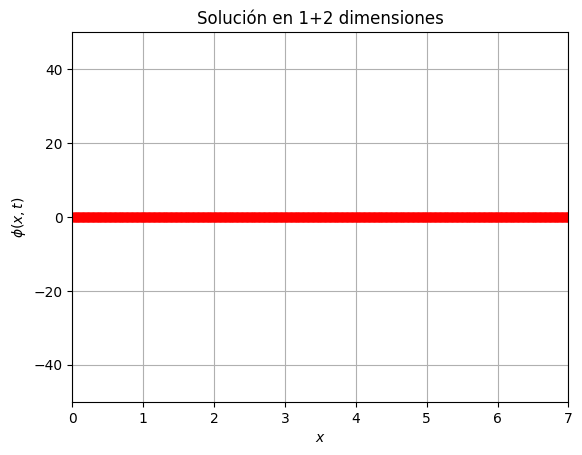

MovieWriter ffmpeg unavailable; using Pillow instead.


In [2]:
l=1; 
nu=1;
n=1;

n =1;
dsig_0=0;
l = 1;
rf = 10;
ri = 0;
Cond_0 = [0.5061, dsig_0];
N1=1000;
h=0.01;
nu=1;

def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=dsig_0;
        s[1]=f[1];
    else:
        s[0]=f[1]; #solucion
        s[1]=l*(((r**n)*f[0])**2-nu**2)*f[0]-((2*(n+1))*f[1])/r; #Derivada 
    return s

sig,r = cod.RK4V(N1,h,f1,Cond_0,ri);

#Condiciones iniciales
F=np.zeros(N1-301);
dF=np.zeros(N1-301);
for i in range(0,N1-301):
    F[i]=sig[i,0]*(r[i]**n);
    dF[i]=n*(r[i]**(n-1)*sig[i,0])+(r[i]**n)*(sig[i,1]);


#Condiciones de frotera

def Condicion_F(xi,t1):
    if xi==0:
        return 0
    else:
        return nu

def Potencial(u):
    v=(l/2)*(u**2-nu**2)**2;
    return v
    
def DerPot(u):
    dv=(l)*(u**2-nu**2)*u;
    return dv

Nombre1='Solución en 1+2 dimensiones';
cod.Dif_Fin_2(n,7,N1-301,N1-301,0.2,F,dF,DerPot,Condicion_F,Nombre1);



Valor constante dt/dx=  0.028571428571428574


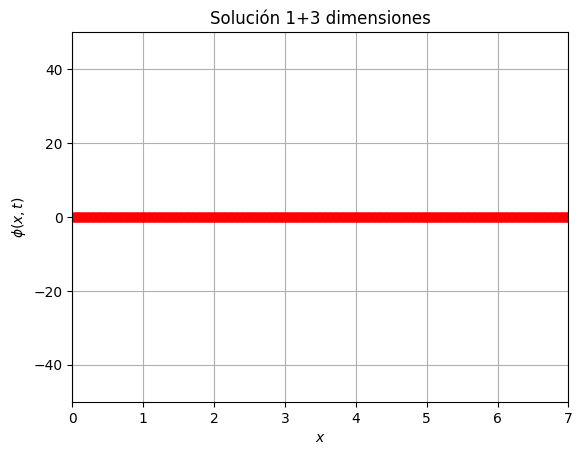

MovieWriter ffmpeg unavailable; using Pillow instead.


In [3]:
nu=1;
l=1;
x_0=np.array([0,0.5061]); #0.5061
r_0=0;
r_f=10;
N1=1000;
h1=0.01;

# declaración de la función del sistema de EDOs
def f1(r,f):
    s=np.zeros(2)
    if r==0:
        s[0]=f[1];
        s[1]=0;
    else:
        s[0]=f[1]; #solucion
        s[1]=-(2*f[1])/r+((2*f[0])/r**2)+l*(f[0]**2-nu**2)*f[0]; #Derivada 
    return s

#Solucion numerica
f,r=cod.RK4V(N1,h1,f1,x_0,r_0);


#Condiciones iniciales
F=np.zeros(N1-301);
dF=np.zeros(N1-301);
for i in range(0,N1-301):
    F[i]=f[i,0];
    dF[i]=f[i,1];

#Condiciones de frotera

def Condicion_F(xi,t1):
    if xi==0:
        return 0
    else:
        return nu

def Potencial(u):
    v=(l/4)*(u**2-nu**2)**2;
    return v
    
def DerPot(u):
    dv=(l)*(u**2-nu**2)*u;
    return dv

Nombre1='Solución 1+3 dimensiones';
cod.Dif_Fin_3(7,N1-301,N1-301,0.2,F,dF,DerPot,Condicion_F,Nombre1);
